In [2]:
import numpy as np
import pandas as pd
from matplotlib.mlab import griddata
import matplotlib.pyplot as plt


In [3]:
#-- Read the data.
# I'm going to use `pandas` to read in and work with your data, mostly due to
# the text site names. Using pandas is optional, however.
data = pd.read_csv('test.txt', delim_whitespace=True)

In [4]:
data.head()

,Lon,Lat,Z,Z2,pos
0,32.6,-13.6,41,9,CHIP
1,27.1,-16.9,43,12,CHOM
2,32.7,-10.2,46,14,ISOK
3,24.2,-13.6,33,13,KABO
4,28.5,-14.4,43,11,KABW


/data/c03n02/cliu/soft/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The griddata function was deprecated in Matplotlib 2.2 and will be removed in 3.1. Use scipy.interpolate.griddata instead.
  from ipykernel import kernelapp as app


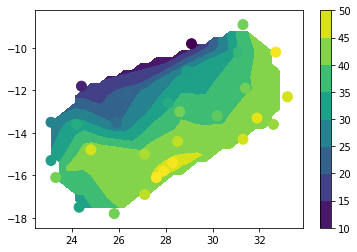

In [5]:
%matplotlib inline
#-- Now let's grid your data.
# First we'll make a regular grid to interpolate onto. This is equivalent to
# your call to `mgrid`, but it's broken down a bit to make it easier to
# understand. The "30j" in mgrid refers to 30 rows or columns.
numcols, numrows = 30, 30
xi = np.linspace(data.Lon.min(), data.Lon.max(), numcols)
yi = np.linspace(data.Lat.min(), data.Lat.max(), numrows)
xi, yi = np.meshgrid(xi, yi)

#-- Interpolate at the points in xi, yi
# "griddata" expects "raw" numpy arrays, so we'll pass in
# data.x.values instead of just the pandas series data.x
x, y, z = data.Lon.values, data.Lat.values, data.Z.values
zi = griddata(x, y, z, xi, yi,interp='linear')

#-- Display the results
fig, ax = plt.subplots()
im = ax.contourf(xi, yi, zi)
ax.scatter(data.Lon, data.Lat, c=data.Z, s=100,
           vmin=zi.min(), vmax=zi.max())
fig.colorbar(im)

plt.show()

In [8]:
print(z)

[41 43 46 33 43 33 46 44 35 24 10 39 44 46 47 31 39 45 31 39 42 15 39 44
 39 38 32 23 27]


In [9]:
print(x)

[32.6 27.1 32.7 24.2 28.5 28.1 27.9 24.8 31.1 25.9 29.1 25.8 33.2 28.3
 27.6 28.9 31.3 31.9 23.1 31.4 27.1 24.4 28.6 31.3 23.3 30.2 24.3 26.4
 23.1]


In [10]:
print(y)

[-13.6 -16.9 -10.2 -13.6 -14.4 -12.6 -15.8 -14.8 -10.2 -13.5  -9.8 -17.8
 -12.3 -15.4 -16.1 -11.1  -8.9 -13.3 -15.3 -11.9 -15.  -11.8 -13.  -14.3
 -16.1 -13.2 -17.5 -12.2 -13.5]


In [11]:
print(xi)

[[23.1        23.44827586 23.79655172 24.14482759 24.49310345 24.84137931
  25.18965517 25.53793103 25.8862069  26.23448276 26.58275862 26.93103448
  27.27931034 27.62758621 27.97586207 28.32413793 28.67241379 29.02068966
  29.36896552 29.71724138 30.06551724 30.4137931  30.76206897 31.11034483
  31.45862069 31.80689655 32.15517241 32.50344828 32.85172414 33.2       ]
 [23.1        23.44827586 23.79655172 24.14482759 24.49310345 24.84137931
  25.18965517 25.53793103 25.8862069  26.23448276 26.58275862 26.93103448
  27.27931034 27.62758621 27.97586207 28.32413793 28.67241379 29.02068966
  29.36896552 29.71724138 30.06551724 30.4137931  30.76206897 31.11034483
  31.45862069 31.80689655 32.15517241 32.50344828 32.85172414 33.2       ]
 [23.1        23.44827586 23.79655172 24.14482759 24.49310345 24.84137931
  25.18965517 25.53793103 25.8862069  26.23448276 26.58275862 26.93103448
  27.27931034 27.62758621 27.97586207 28.32413793 28.67241379 29.02068966
  29.36896552 29.71724138 30.0655172

[[        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan 33.24030048 35.44891546
  37.50610709 39.06397966 39.81323541 40.56381056         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan]
 [        nan         nan         nan 34.76851924 36.31339797 37.91310859
  39.33951134 40.29982643 40.5774464  40.828661   41.47853142         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         na

/data/c03n02/cliu/soft/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


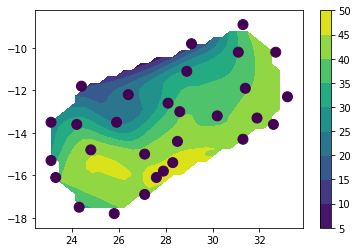

In [6]:
from scipy.interpolate import griddata
zi= griddata((x, y), z, (xi, yi),method='cubic')
print(zi)
#-- Display the results
fig, ax = plt.subplots()
im = ax.contourf(xi, yi, zi)
ax.scatter(data.Lon, data.Lat, c=data.Z, s=100,
           vmin=zi.min(), vmax=zi.max())
fig.colorbar(im)

plt.show()